**Preparation and necessary tools**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from itertools import product, combinations

Function transforming array of 3D points onto 2D simplex.

In [49]:
proj = np.array(
    [[-1 * np.cos(30. / 360. * 2. * np.pi),np.cos(30. / 360. * 2. * np.pi), 0.],
     [-1 * np.sin(30. / 360. * 2. * np.pi),-1 * np.sin(30. / 360. * 2. * np.pi), 1.]])

def proj_3D_simplex(array_to_be_transformed):
    proj_mat = np.array(
    [[-1 * np.cos(30. / 360. * 2. * np.pi),np.cos(30. / 360. * 2. * np.pi), 0.],
     [-1 * np.sin(30. / 360. * 2. * np.pi),-1 * np.sin(30. / 360. * 2. * np.pi), 1.]])
    return proj_mat @ array_to_be_transformed

Function for drawing lines.

In [50]:
def draw_line(start, end, points=1000):
    '''
    Return array of points on a line segemnt.
    
    Parameters
    ----------
    start : array_like
        starting point
    end : array_like
        end point
    points : int, optional
        number of points included in the array, including start and end points
        
        
    Return
    ------
    array of point on the line, with row index being coordinate index and column index being index of points.
    '''
    
    # ts = 0 represents starting point, ts = 1 represents end point.
    ts = np.array([np.linspace(0,1,points)])
    
    start_reshaped = np.array(start).reshape((3,1))
    end_reshaped = np.array(end).reshape((3,1))
    
    return start_reshaped + ((end_reshaped - start_reshaped) @ ts)

Draw triangle.

In [51]:
# project the boundary on the simplex onto the boundary of the triangle
PBd21 = proj@draw_line([0,1,0], [1,0,0], 2)
PBd32 = proj@draw_line([0,0,1], [0,1,0], 2)
PBd31 = proj@draw_line([0,0,1], [1,0,0], 2)

In [126]:
def initial_figure(vertex_label = True):
    
    ax.axis("off")
    
    ax.plot(PBd21[0], PBd21[1], color='black', linewidth=3)
    ax.plot(PBd32[0], PBd32[1], color='black', linewidth=3)
    ax.plot(PBd31[0], PBd31[1], color='black', linewidth=3)
    
    if vertex_label:
        ax.text(-0.8660254-0.1, -0.5 +0.05 , "$e_1$",fontsize=12)
        ax.text(+0.8660254+0.05, -0.5 +0.05 , "$e_2$",fontsize=12)
        ax.text(0-0.03, 1 +0.1 , "$e_3$",fontsize=12)
    return fig, ax

Plot 
$\dot{P}/P = 1 - 5(x_1x_2 + x_2x_3 + x_3x_4 + x_4x_5 + x_5x_1)$, restricting $x_4 = x_5 = 0.25$ (i.e. the simplex $x_1 + x_2 + x_3 = 0.5)$. On the simplex, the function equals to $1-5(x_1 x_2 + x_2 x_3 + 0.25x_3 + 0.0625 + 0.25x_1)$


In [65]:
# Constructing 2D meshes
mesh = np.array(list(product(np.linspace(0,1,101), np.linspace(0,1,101)))).T

# Filtering points with sum of coordinates > 0.5
mesh = mesh[:,mesh[0] + mesh[1] <= 0.5]

# computing the third value
mesh = np.vstack((mesh, 0.5 - mesh[0] - mesh[1]))

# evaluate the point
Phi_arr = 1-5*(mesh[0]*mesh[1] + mesh[1]*mesh[2] + 0.25*mesh[0] + 0.25*mesh[2] + 0.0625)

# coloring
color = np.ones(mesh.shape[1])
color[Phi_arr >= 0] = 0

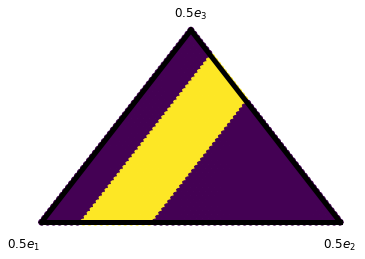

In [95]:
plt.axis("off")

plt.plot(0.5*PBd21[0], 0.5*PBd21[1], color='black', linewidth=5)
plt.plot(0.5*PBd32[0], 0.5*PBd32[1], color='black', linewidth=5)
plt.plot(0.5*PBd31[0], 0.5*PBd31[1], color='black', linewidth=5)


plt.text(-0.8660254/2-0.1, -0.4+0.05 , "$0.5e_1$",fontsize=12)
plt.text(+0.8660254/2-0.05, -0.4+0.05 , "$0.5e_2$",fontsize=12)
plt.text(0-0.05, 0.5+0.05 , "$0.5e_3$",fontsize=12)

plt.scatter(proj_3D_simplex(mesh)[0], proj_3D_simplex(mesh)[1], c = color)
# plt.colorbar()
# plt.rcParams['axes.titley'] = 1.0 
# plt.title("Value of $\dot{P}/P$ on cross-section $x_1+x_2+x_3=0.5, x_4=x_5=0.25$", x=0.5, y=1.1)
# plt.savefig("Phi_on_cross_section")

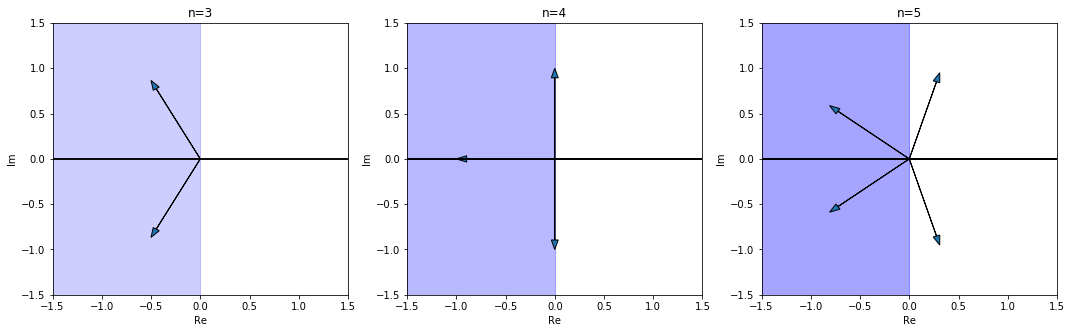

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

n_arr = [3,4,5]

for i in range(3):
    n = n_arr[i]
    roots = np.roots([1,] + [0,]*(n-1) + [-1,])
    
    for root in roots[:-1]:
        ax[i].arrow(0,0,root.real,root.imag, length_includes_head=True, head_width=0.07)
        ax[i].set_xlim([-1.5,1.5])
        ax[i].set_ylim([-1.5,1.5])
        ax[i].set_xlabel("Re")
        ax[i].set_ylabel("Im")
        ax[i].set_title(f"n={n}")
        ax[i].axvspan(-1.5, 0, color='blue', alpha=0.1)
        ax[i].hlines([0], xmin=-1.5, xmax=1.5)
        
# plt.savefig("hypercycle_roots")